In [51]:
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
from sklearn import tree
import graphviz
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
df = pd.read_pickle("./TempData/preprocessed")
df.head()

,Unnamed: 0,text,label,tweet_length,has_user,has_hashtag,has_url,tidy_tweet,tidy_tweet_tokens,tokens_no_stop
0,0,These girls are the equivalent of the irritati...,racism,99,False,True,False,these girls equivalent irritating asian girls ...,"[these, girl, equivalent, irritate, asian, gir...","[girl, equivalent, irritate, asian, girl, coup..."
1,2,"Colin will save them. They're pretty blondes, ...",sexism,75,False,True,False,colin will save them they pretty blondes they ...,"[will, save, pretty, blonde, keep, tell]","[save, pretty, blonde, keep, tell]"
2,9,Stop saying dumb blondes with pretty faces as ...,sexism,94,False,True,False,stop saying dumb blondes with pretty faces nee...,"[stop, say, dumb, blonde, with, pretty, face, ...","[stop, say, dumb, blonde, pretty, face, need, ..."
3,10,Obviously natural blondes!! #mkr,sexism,32,False,True,False,obviously natural blondes,"[obviously, natural, blonde]","[obviously, natural, blonde]"
4,11,R u fucking kidding - catwalk - all that's mis...,sexism,65,False,True,False,fucking kidding catwalk that missing pole,"[fuck, kid, catwalk, that, miss, pole]","[fuck, kid, catwalk, miss, pole]"


In [53]:
def identity_tokenizer(text):
    return text
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)
X = vectorizer.fit_transform(df['tokens_no_stop'].values)


In [54]:
y = np.zeros((len(df['text'])))
for idx, row in df.iterrows():
    if row['label'] not in ['none' ,'normal','NOT']:
        y[idx] = 1

In [55]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=10)
clf = clf.fit(X, y)

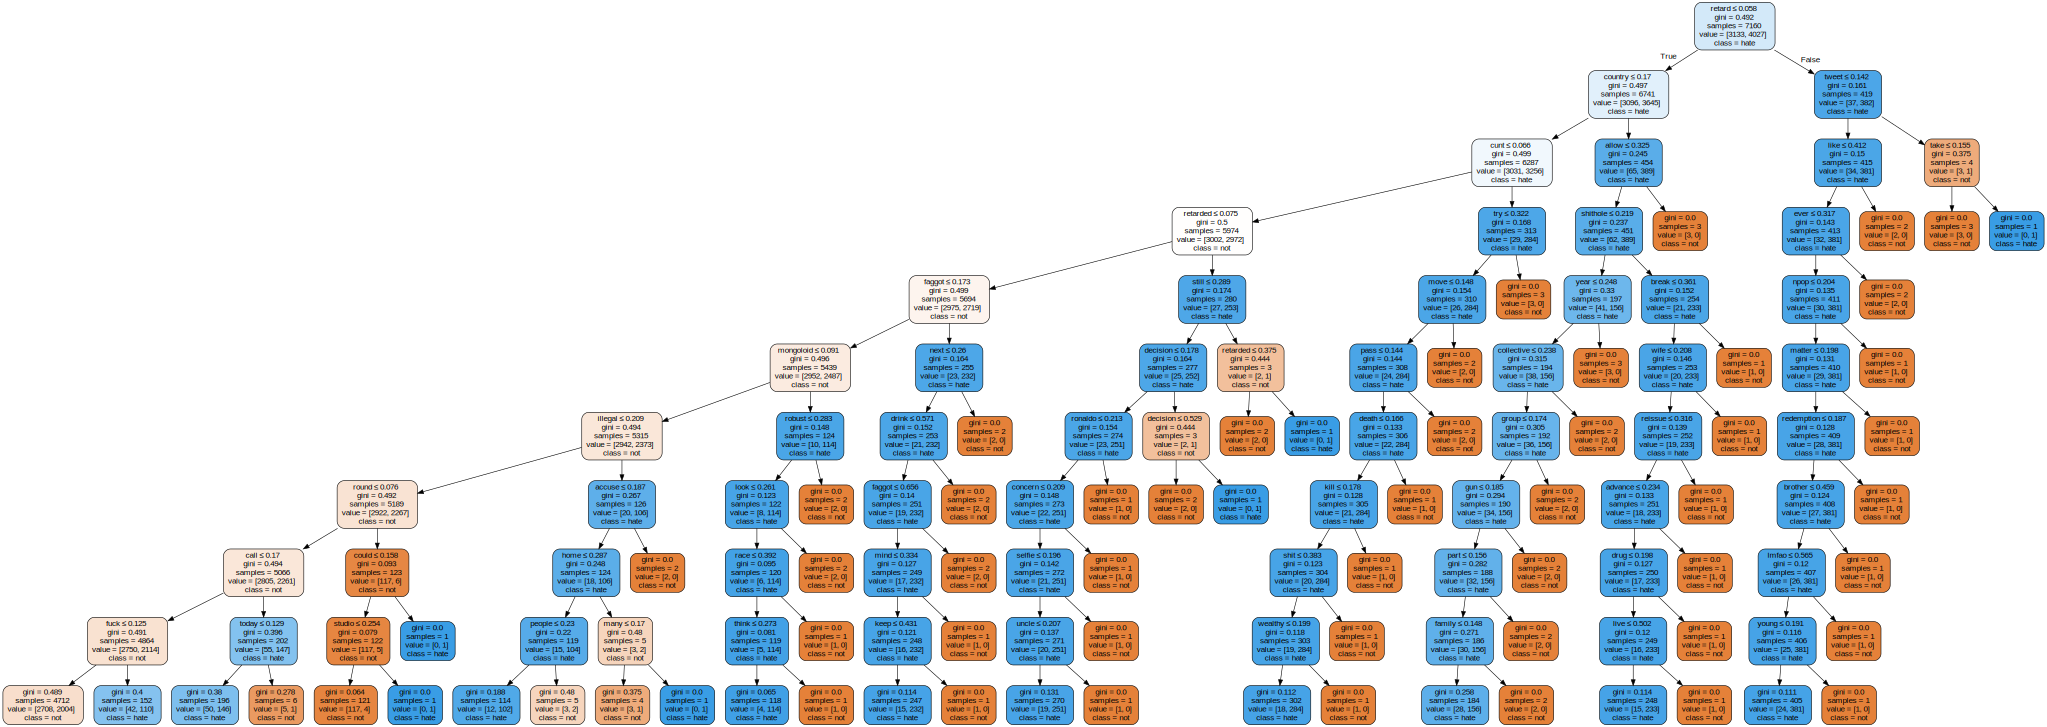

In [56]:
dot_data = tree.export_graphviz(clf, out_file=None,
    class_names=['not','hate'],
    feature_names=vectorizer.get_feature_names(),
    filled=True, rounded=True,  special_characters=True) 

graph = graphviz.Source(dot_data) 
graph.render("./twitter_data/tree_tfidf") 

display(graphviz.Source(dot_data))

## Feature importance
_feature_importances_ attribute on the model can be used to get most important features. It gives the value for each feature, more the value more the importance. The top 20 important features are shown below.

Ver [Feature Importance Measures for Tree Models — Part I](https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3)

In [57]:
importances = list(clf.feature_importances_)
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(vectorizer.get_feature_names(), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# print(feature_importances)
top_i = 0
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))
    if top_i == 20:
        break
    top_i += 1

Variable: retard               Importance: 0.1316387682
Variable: faggot               Importance: 0.125138429
Variable: cunt                 Importance: 0.1211456711
Variable: retarded             Importance: 0.1190809893
Variable: country              Importance: 0.117944631
Variable: mongoloid            Importance: 0.0657029905
Variable: illegal              Importance: 0.0487766227
Variable: round                Importance: 0.0460145504
Variable: call                 Importance: 0.0404005358
Variable: fuck                 Importance: 0.0317898129
Variable: try                  Importance: 0.0060467845
Variable: allow                Importance: 0.0053760173
Variable: today                Importance: 0.0047198883
Variable: year                 Importance: 0.0046320697
Variable: look                 Importance: 0.0043049807
Variable: tweet                Importance: 0.0042875932
Variable: shithole             Importance: 0.0042335078
Variable: robust               Importance: 0.00416

In [58]:
a = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
a.to_csv("./twitter_data/word_vector_tf_id.csv")
a.head()

,aazadi,abdicate,abduct,abend,abet,abide,ability,able,ableist,abnormal,...,yuuuummmm,zakir,zealot,zeebie,zero,zionist,zomato,zone,zucchini,zyzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
a['like'].head()

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Name: like, Length: 100, dtype: float64

## feature relevance

In [ ]:
vectorizer.ge